<a href="https://colab.research.google.com/github/MachineLearnia/Python-Machine-Learning/blob/master/17%20-%20Pandas%20(les%20Bases).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 17/30 Pandas (les Bases) Et Analyse du Titanic

In [88]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 1. Charger vos données dans un DataFrame Pandas

https://www.youtube.com/redirect?q=http%3A%2F%2Fbiostat.mc.vanderbilt.edu%2Fwiki%2Fpub%2FMain%2FDataSets%2Ftitanic3.xls&redir_token=IS7fnKxJQSAQBgyL_W_n-Yg2XZJ8MTU4NzkxOTk0MkAxNTg3ODMzNTQy&v=zZkNOdBWgFQ&event=video_description


Les options les plus courantes :
- read_csv
- read_excel



In [89]:
data = pd.read_excel('Dataset/titanic.xls')  # chargement du dataset

In [90]:
print("data.shape :", data.shape)       # nombre de lignes et de colonnes
print("data.columns :", data.columns)   # noms des colonnes
print("data.head :\n", data.head)         # premières lignes du dataset

data.shape : (1309, 14)
data.columns : Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')
data.head :
 <bound method NDFrame.head of       pclass  survived                                             name  \
0          1         1                    Allen, Miss. Elisabeth Walton   
1          1         1                   Allison, Master. Hudson Trevor   
2          1         0                     Allison, Miss. Helen Loraine   
3          1         0             Allison, Mr. Hudson Joshua Creighton   
4          1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   
...      ...       ...                                              ...   
1304       3         0                             Zabour, Miss. Hileni   
1305       3         0                            Zabour, Miss. Thamine   
1306       3         0                        Zakarian, Mr. Mapriededer   
1

In [91]:
data.describe()  # statistiques descriptives

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


## 2. Nettoyer votre Dataset avec drop(), dropna() et fillna()

In [92]:
data = data.drop(['name', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'], axis=1)
print("data.head()")
print(data.head())
print(data.describe())

data.head()
   pclass  survived     sex      age
0       1         1  female  29.0000
1       1         1    male   0.9167
2       1         0  female   2.0000
3       1         0    male  30.0000
4       1         0  female  25.0000
            pclass     survived          age
count  1309.000000  1309.000000  1046.000000
mean      2.294882     0.381971    29.881135
std       0.837836     0.486055    14.413500
min       1.000000     0.000000     0.166700
25%       2.000000     0.000000    21.000000
50%       3.000000     0.000000    28.000000
75%       3.000000     1.000000    39.000000
max       3.000000     1.000000    80.000000


data.shape : (1046, 4)
value_counts() : pclass
3    501
1    284
2    261
Name: count, dtype: int64


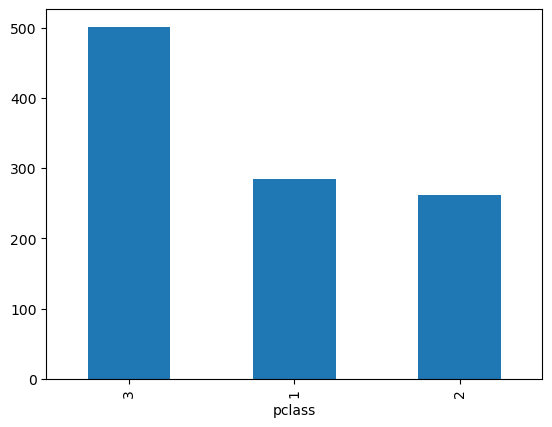

In [93]:
data = data.dropna(axis=0)  # supprime les lignes avec des valeurs manquantes
print("data.shape :", data.shape)
print("value_counts() :", data['pclass'].value_counts())
data['pclass'].value_counts().plot(kind='bar')
plt.show()

<Axes: >

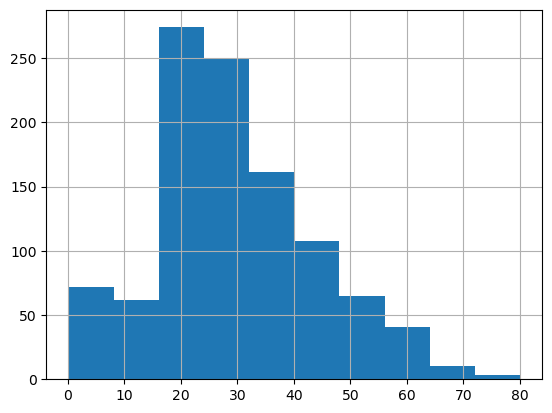

In [94]:
data['age'].hist()

## 3. Groupby() et value_counts()

In [ ]:
data.groupby(['sex']).mean(numeric_only=True)

,pclass,survived,age
sex,,,
female,2.048969,0.752577,28.687071
male,2.300912,0.205167,30.585233


In [ ]:
data.groupby(['sex', 'pclass']).mean(numeric_only=True)

survived        age
sex    pclass                     
female 1       0.962406  37.037594
       2       0.893204  27.499191
       3       0.473684  22.185307
male   1       0.350993  41.029250
       2       0.145570  30.815401
       3       0.169054  25.962273

In [97]:
data['pclass'].value_counts()

pclass
3    501
1    284
2    261
Name: count, dtype: int64

In [100]:
# les serie et les dataframe sont des objets mutables
data = pd.read_excel('Dataset/titanic.xls')  # chargement du dataset en dataframe
print(data['age'][3])  # accès à la valeur de la série
data = data.set_index('name')  # set_index() permet de transformer une colonne en index
print(data['age'][0:5])  # accès à la série
print(data['age']['Allison, Mr. Hudson Joshua Creighton'])

data = pd.read_excel('Dataset/titanic.xls')  # chargement du dataset en dataframe
# Utiliser numeric_only=True pour ne calculer la moyenne que sur les colonnes numériques
print(data[data['age'] < 18].groupby(['sex', 'pclass']).mean(numeric_only=True))


30.0
name
Allen, Miss. Elisabeth Walton                      29.0000
Allison, Master. Hudson Trevor                      0.9167
Allison, Miss. Helen Loraine                        2.0000
Allison, Mr. Hudson Joshua Creighton               30.0000
Allison, Mrs. Hudson J C (Bessie Waldo Daniels)    25.0000
Name: age, dtype: float64
30.0
               survived        age     sibsp     parch        fare   body
sex    pclass                                                            
female 1       0.875000  14.125000  0.500000  0.875000  104.083337    NaN
       2       1.000000   8.273150  0.666667  1.166667   27.998844    NaN
       3       0.543478   8.416667  1.456522  1.043478   18.284148  328.0
male   1       0.857143   9.845243  0.571429  1.714286  129.752371    NaN
       2       0.733333   6.222220  0.600000  0.933333   31.750280    NaN
       3       0.233333   9.838888  1.966667  1.016667   21.677570   65.5


## 4. Exercice
- Créer des catégories d'ages avec la fonction map() de pandas
- Créer des catégories de genres avec cat.codes

In [101]:
def category_ages(age):
    if age <= 20:
        return '<20 ans'
    elif (age > 20) & (age <= 30):
        return '20-30 ans'
    elif (age > 30) & (age <= 40):
        return '30-40 ans'
    else:
        return '+40 ans'

In [102]:
data['age'] = data['age'].map(category_ages)

In [103]:
data['sex'].astype('category').cat.codes

0       0
1       1
2       0
3       1
4       0
       ..
1304    0
1305    0
1306    1
1307    1
1308    1
Length: 1309, dtype: int8